<a href="https://colab.research.google.com/github/mikecchau/heart_disease_project/blob/main/Heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart disease classification project**

*Here we will be utilizing an ML model for the purpose of classifying heart disease based upon patient feature data*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%cd /content/heart_disease_project

/content/heart_disease_project


In [6]:
df=pd.read_csv('heart-disease.csv')

The following table shows patient feature data from the heart disease dataset

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Displaying the dataframe as a plot to explain shape

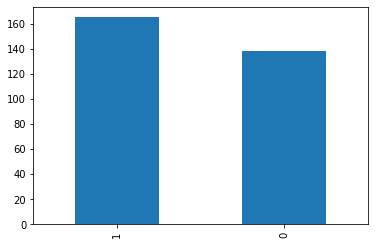

In [8]:
df.target.value_counts().plot(kind='bar')

## Exploring the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
print('Number of patients with heart disease: ', len(df[df['target'] == 1]))

Number of patients with heart disease:  165


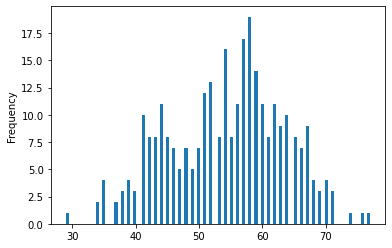

In [12]:
df['age'].plot.hist(bins=100);

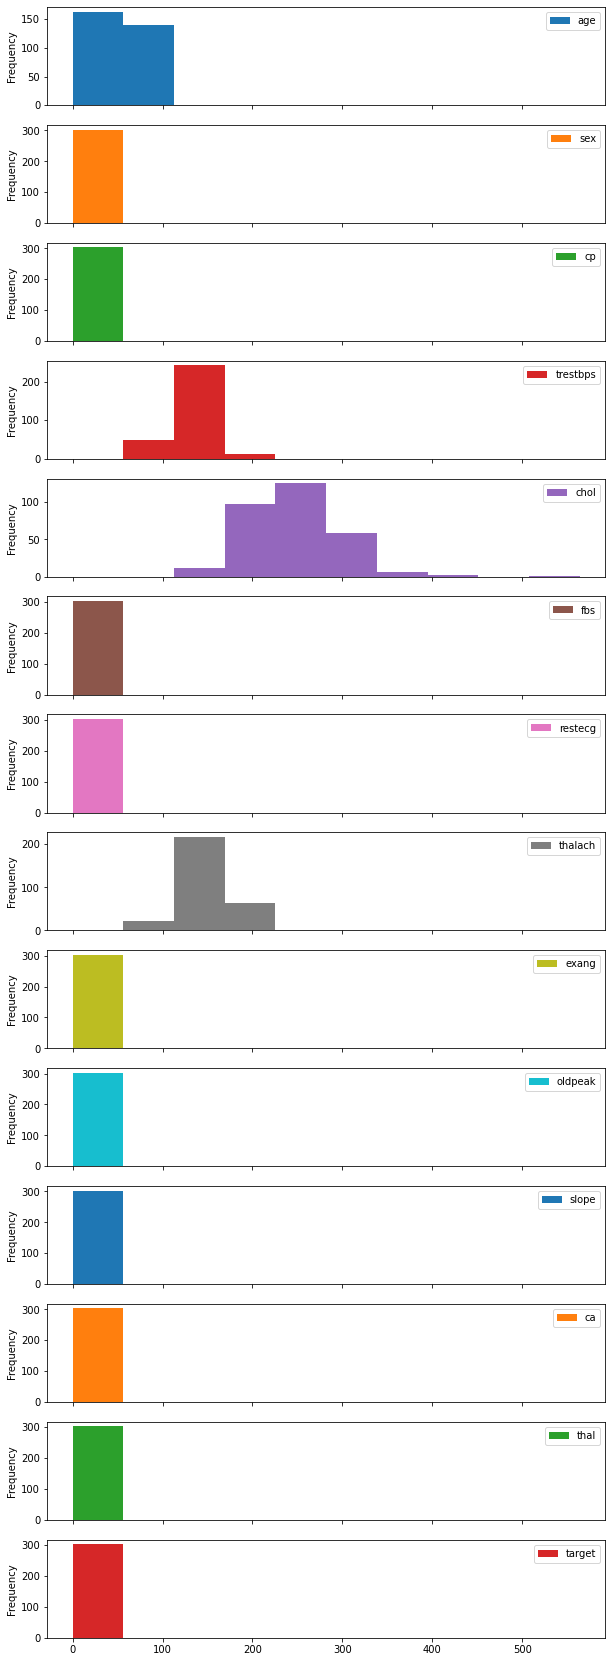

In [13]:
df.plot.hist(figsize=(10,30),subplots=True);

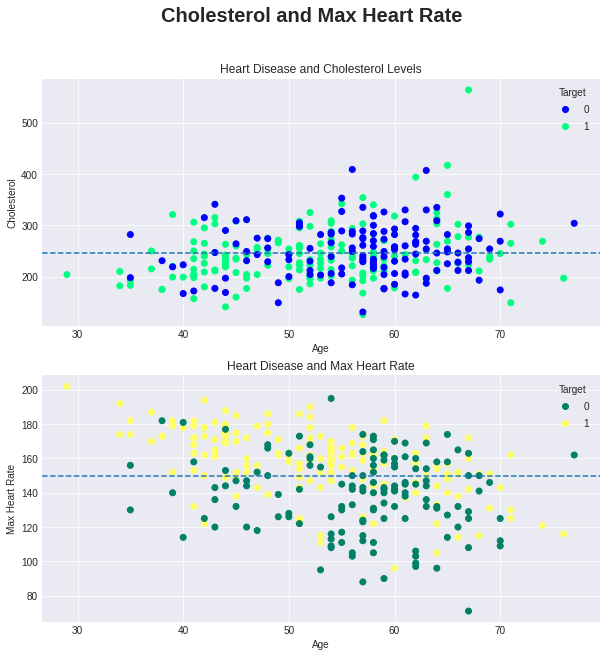

In [14]:
# Create subplots of various dataset values for visualization
plt.style.use('seaborn-darkgrid')
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10))

fig.suptitle('Cholesterol and Max Heart Rate', fontsize=20,fontweight='bold')

# Create scatter plot of cholesterol values and find average
scatter=ax0.scatter(x=df['age'],
                    y=df['chol'],
                    c=df['target'],
                    cmap='winter')

ax0.set(title='Heart Disease and Cholesterol Levels',
        xlabel="Age",
        ylabel='Cholesterol')

ax0.legend(*scatter.legend_elements(), title='Target')

ax0.axhline(y=df['chol'].mean(), linestyle='--');

# Create scatter plot of thalach values and find average
scatter=ax1.scatter(x=df['age'],
                    y=df['thalach'],
                    c=df['target'],
                    cmap='summer')

ax1.set(title='Heart Disease and Max Heart Rate',
        xlabel="Age",
        ylabel='Max Heart Rate')

ax1.legend(*scatter.legend_elements(), title='Target')

ax1.axhline(y=df['thalach'].mean(), linestyle='--');

## Preparing data and feeding it into a classifier

In [15]:
# Create features matrix
X = df.drop('target', axis=1)

In [16]:
# Create label matrix
y = df['target']

In [17]:
# Import sklearn model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf = RandomForestClassifier()

In [18]:
# Create train/test split of data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [19]:
# Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Make predictions on test data
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [21]:
# Evaluate metrics
print('Model Accuracy: {}\n'.format(clf.score(X_test,y_test)))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test,y_preds))

Model Accuracy: 0.7540983606557377

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.79      0.72      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

